In [1]:
import Pkg; Pkg.activate(".")

using Revise # for dev 
using DeconvMultiStep
using LinearAlgebra

using FITSIO

include("plot_utils.jl")

  Activating project at `~/Desktop/En cours !/Simon/DeconvMultiStep/DeconvMultiStep.jl/notebooks`


plot_recon (generic function with 1 method)

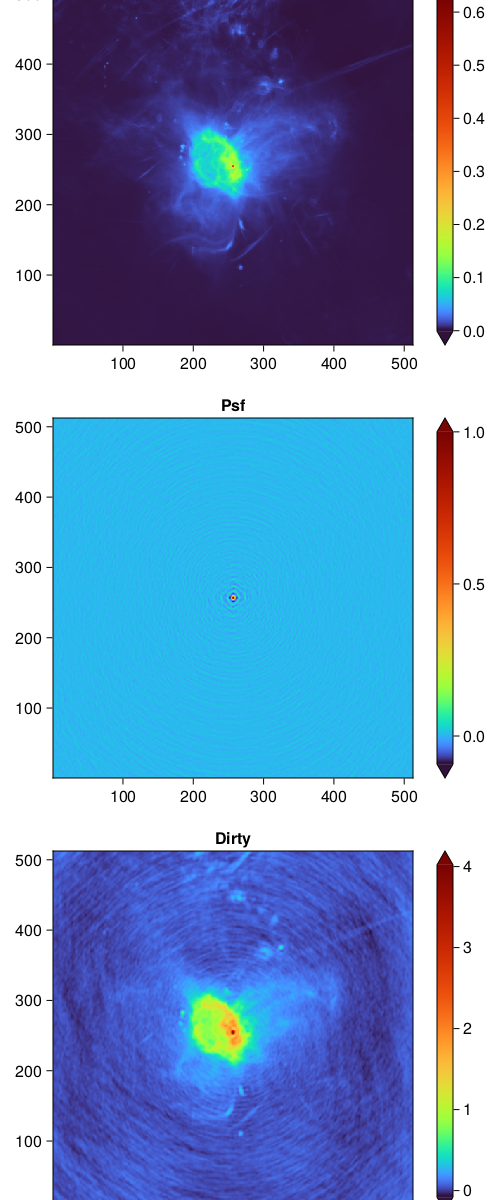

In [33]:
sky = dropdims(Float64.(read(FITS("Meerkat_Galactic_center_512_ext.fits")[1])), dims=(3,4))
psf = dropdims(Float64.(read(FITS("Meerkat_Galactic_center_invert_psf.fits")[1])), dims=(3,4))
dirty = dropdims(Float64.(read(FITS("Meerkat_Galactic_center_invert_dirty.fits")[1])), dims=(3,4))

fig = Figure(resolution = (500, 1200))   
ax = [Axis(fig[i, 1], aspect=DataAspect()) for i in 1:3]
cmap = cgrad(:turbo, scale=:exp10 )

hm1 = heatmap!(ax[1,1], sky, colormap=cmap)
Colorbar(fig[1, 2], hm1)
ax[1,1].title="Sky"
    
hm2 = heatmap!(ax[2,1], psf, colormap=cmap)
Colorbar(fig[2, 2], hm2)
ax[2,1].title="Psf"
    
hm3 = heatmap!(ax[3,1], dirty, colormap=cmap)
Colorbar(fig[3, 2], hm3)
ax[3,1].title="Dirty"
    
rowsize!(fig.layout, 1, Aspect(1, 1))
rowsize!(fig.layout, 2, Aspect(1, 1))
rowsize!(fig.layout, 3, Aspect(1, 1))
                
fig

Progress: 100%|█████████████████████████████████████████| Time: 0:00:44


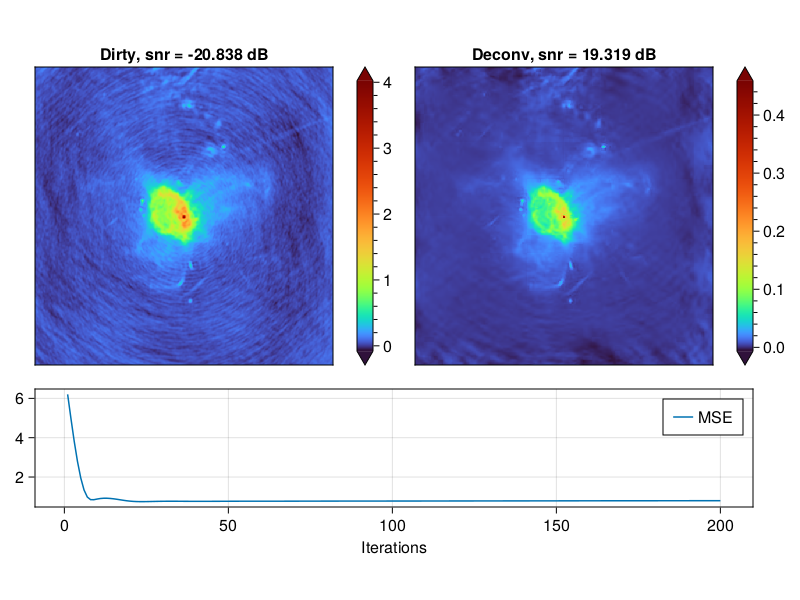

In [32]:
η = compute_step(psf)
i_e, mse = fista(psf, dirty, 0.5, 200, η; sky=sky, show_progress=true)

titles = ["Dirty, snr = $(snr(sky, dirty)) dB"
        "Deconv, snr = $(snr(sky, i_e)) dB"]
fig = plot_deconv(dirty, sky, i_e, mse, titles)

> 1
> 2
> 3
> 4
> 5
> 6
> 7
> 8
> 9
> 10
> 11
> 12
> 13
> 14
> 15
> 16
> 17
> 18
> 19
> 20


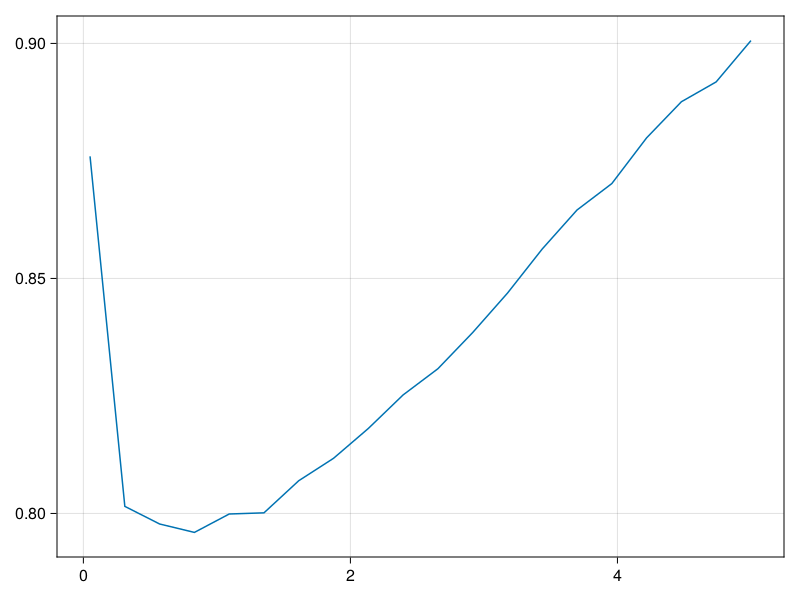

In [31]:
η = compute_step(psf)
λ_pl = LinRange(5e-2, 5.0, 20)
mse = similar(λ_pl)
for (k, λ) in enumerate(λ_pl)
    println("> $k")
    i_e = fista(psf, dirty, λ, 200, η)
    mse[k] = norm((sky - i_e))
end
    
lines(λ_pl, mse)